In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)


In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
X.shape, y.shape

((569, 30), (569,))

In [ ]:
Dataset contains 30 numerical features and binary target (malignant / benign).

In [4]:
pd.Series(y).value_counts()

1    357
0    212
Name: count, dtype: int64

In [ ]:
The dataset is slightly imbalanced but suitable for classification.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

In [8]:
accuracy_score(y_test, y_pred_linear)

0.9736842105263158

In [9]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)

In [10]:
accuracy_score(y_test, y_pred_rbf)

0.9824561403508771

In [ ]:
RBF kernel handles non-linear decision boundaries better.

In [11]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

grid = GridSearchCV(
    SVC(kernel='rbf', probability=True),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train_scaled, y_train)


,estimator,SVC(probability=True)
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.01, 0.1, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [12]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [13]:
best_model = grid.best_estimator_

In [14]:
cm = confusion_matrix(y_test, best_model.predict(X_test_scaled))
cm

array([[41,  1],
       [ 1, 71]])

In [15]:
print(classification_report(y_test, best_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [16]:
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


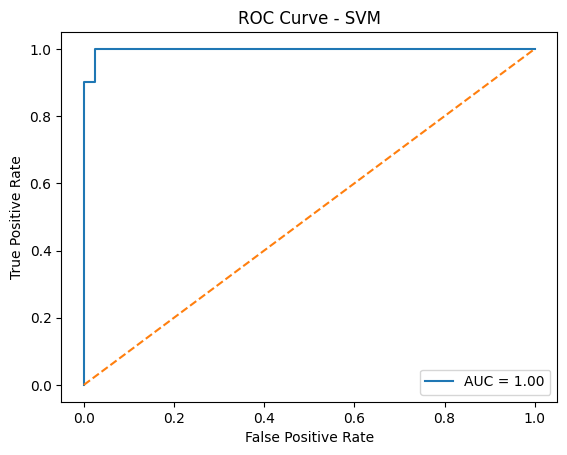

In [17]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


In [18]:
import joblib

joblib.dump(best_model, "svm_breast_cancer_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']